In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv('/Users/SamuelLP/Desktop/git/Challenge_Nexialog/data/data_variables_metiers.csv', sep=',')
data["date_mensuelle"] = pd.to_datetime(data["date_mensuelle"])
data.head()

,SK_ID_CURR,TARGET,date_mensuelle,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,CNT_INSTALMENT_FUTURE,AMT_APPLICATION,AMT_CREDIT_y,NAME_CLIENT_TYPE,AMT_PAYMENT
0,341177,1,2013-01-01,Cash loans,99000.0,354276.0,28120.5,Working,Secondary / secondary special,Civil marriage,...,52490.250000,0.000000,0.0,0.0,Consumer credit,5.000000,65316.150,69522.3000,Repeater,4164.552692
1,410860,0,2013-01-01,Cash loans,157500.0,225000.0,9909.0,Pensioner,Higher education,Married,...,153699.367500,3730.875000,0.0,0.0,Consumer credit,5.000000,167314.500,179275.5000,New,19716.777000
2,125382,0,2013-01-01,Cash loans,76500.0,808650.0,23773.5,Pensioner,Secondary / secondary special,Married,...,192250.500000,47592.000000,0.0,0.0,Consumer credit,6.785714,170644.500,168273.0000,New,12352.523824
3,416718,0,2013-01-01,Cash loans,157500.0,315000.0,11673.0,Working,Secondary / secondary special,Married,...,418197.310312,202930.281562,0.0,0.0,Consumer credit,8.707692,97378.875,118605.9375,Repeater,27195.907846
4,280621,0,2013-01-01,Cash loans,90000.0,1078200.0,31522.5,Working,Secondary / secondary special,Married,...,69079.500000,0.000000,0.0,0.0,Credit card,4.222222,76363.137,92751.3000,Repeater,5820.422344


In [25]:
for col in data.select_dtypes(include = "object").columns.tolist():
    if data[col].isna().sum()/data.shape[0] > 0.35: data.dropna(subset=[col], inplace=True)
    else: data.fillna({col: data[col].mode()[0]}, inplace=True)

In [26]:
for col in data.select_dtypes(include = np.number).columns.tolist():
    if data[col].isna().sum()/data.shape[0] > 0.35: data.dropna(subset=[col], inplace=True)
    else: data.fillna({col: data[col].median()}, inplace=True)

## CATEGORIELLE

In [27]:
cats = data.select_dtypes(include = "object").columns.tolist()
cats

['NAME_CONTRACT_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE',
 'CREDIT_TYPE',
 'NAME_CLIENT_TYPE']

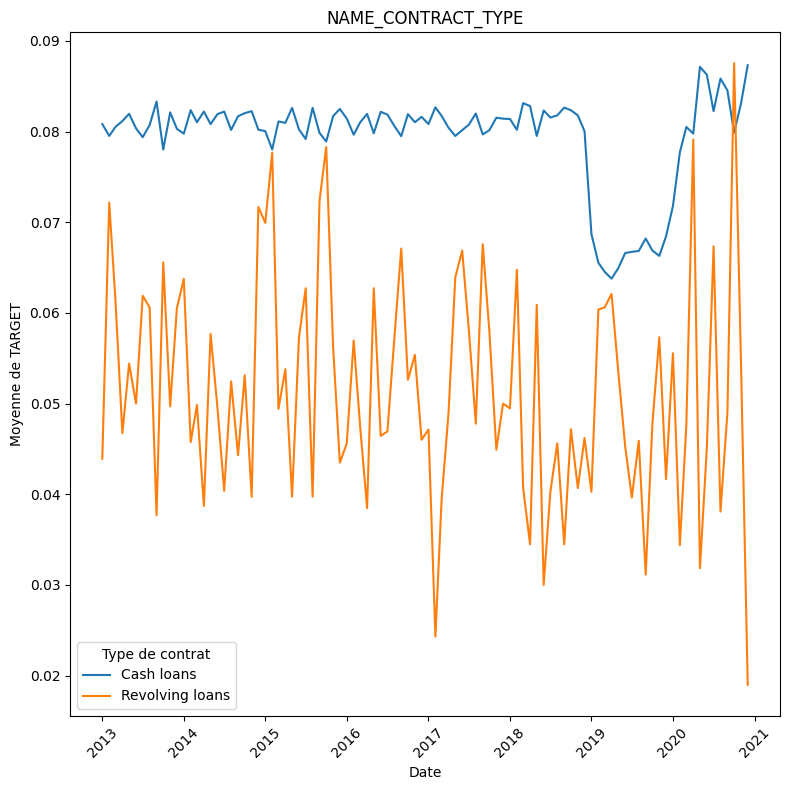

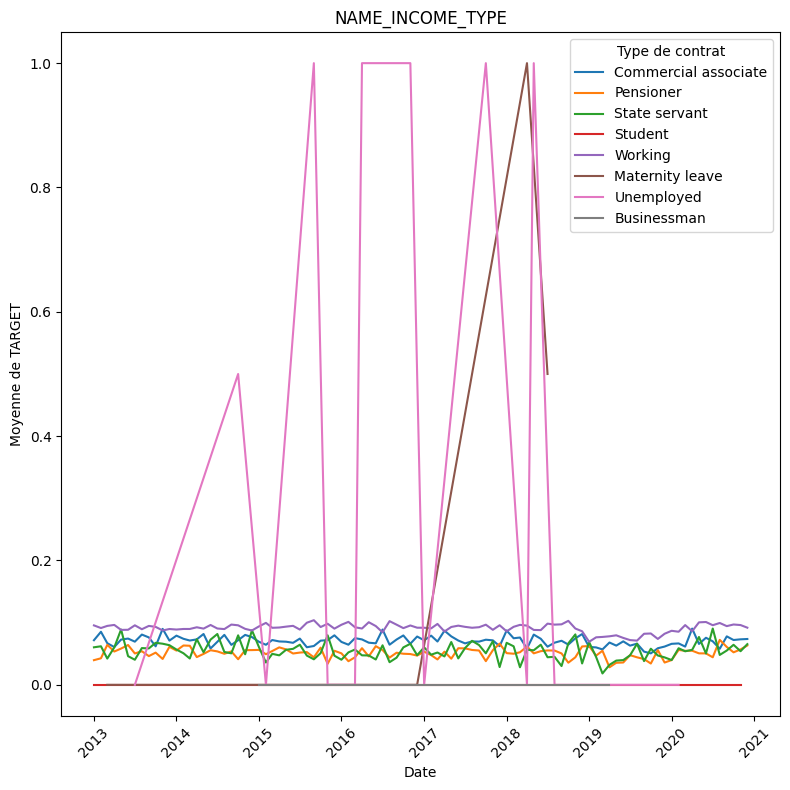

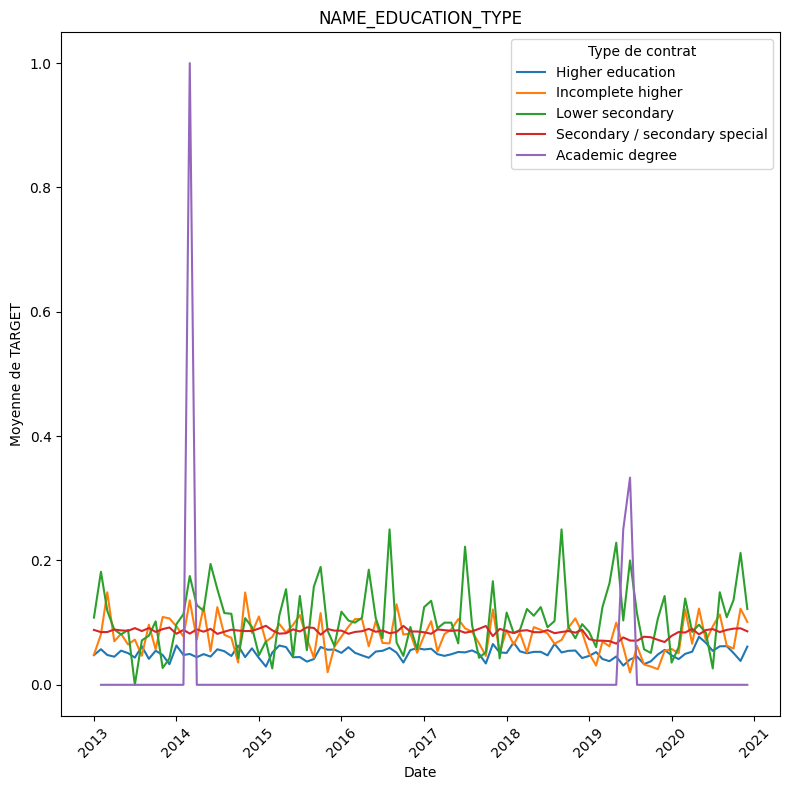

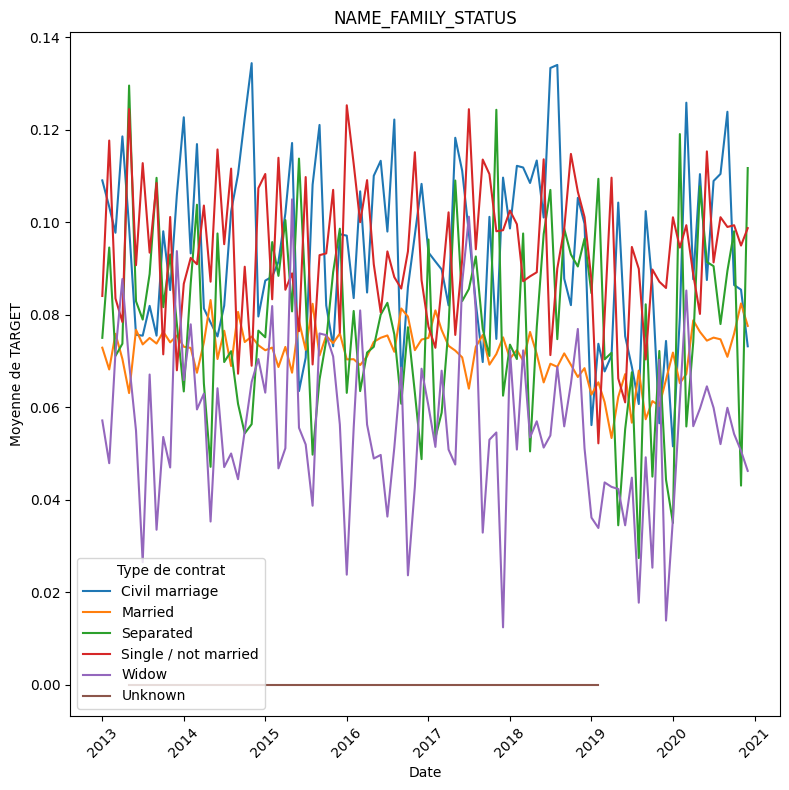

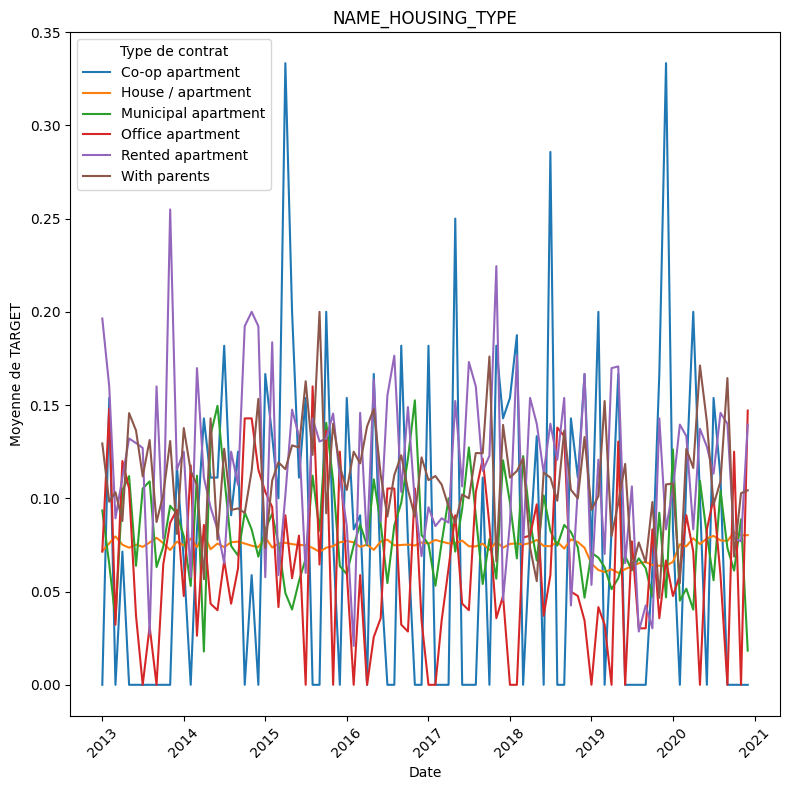

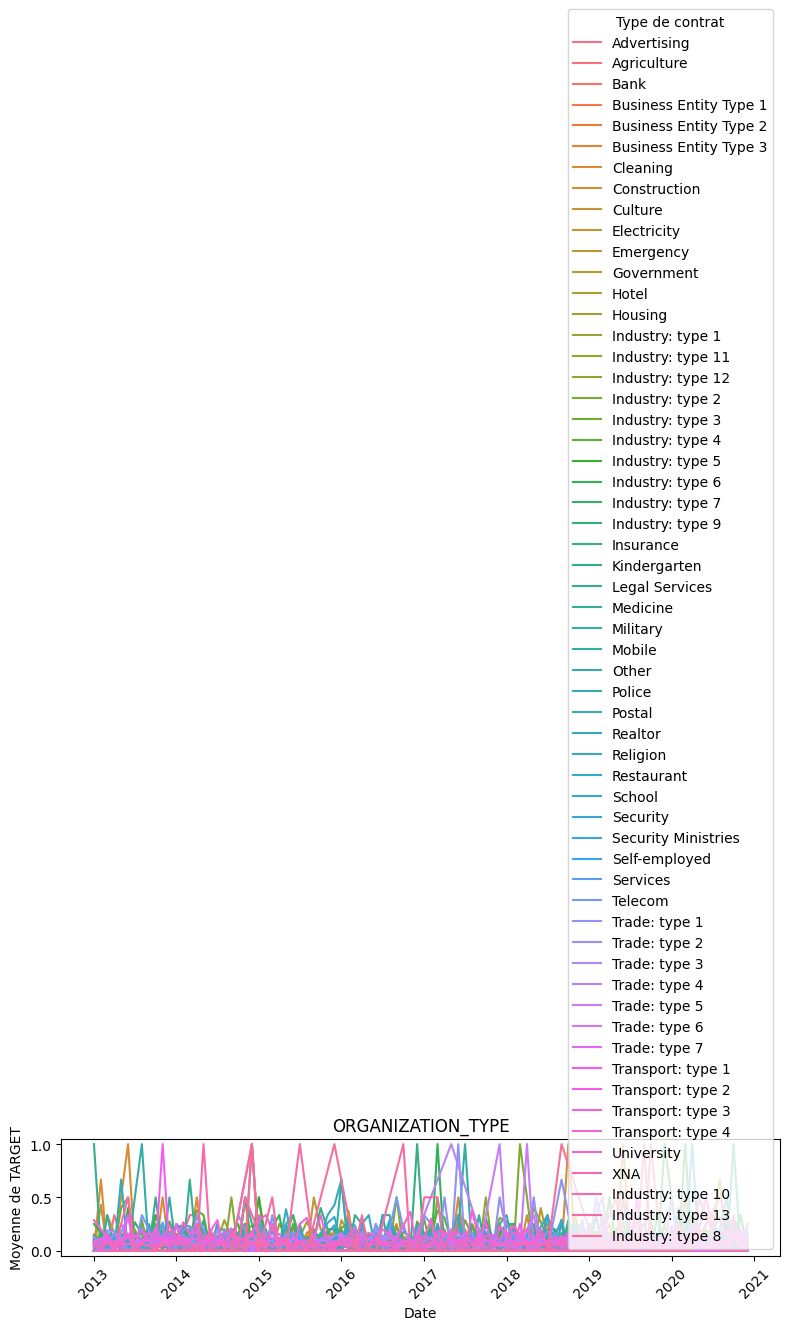

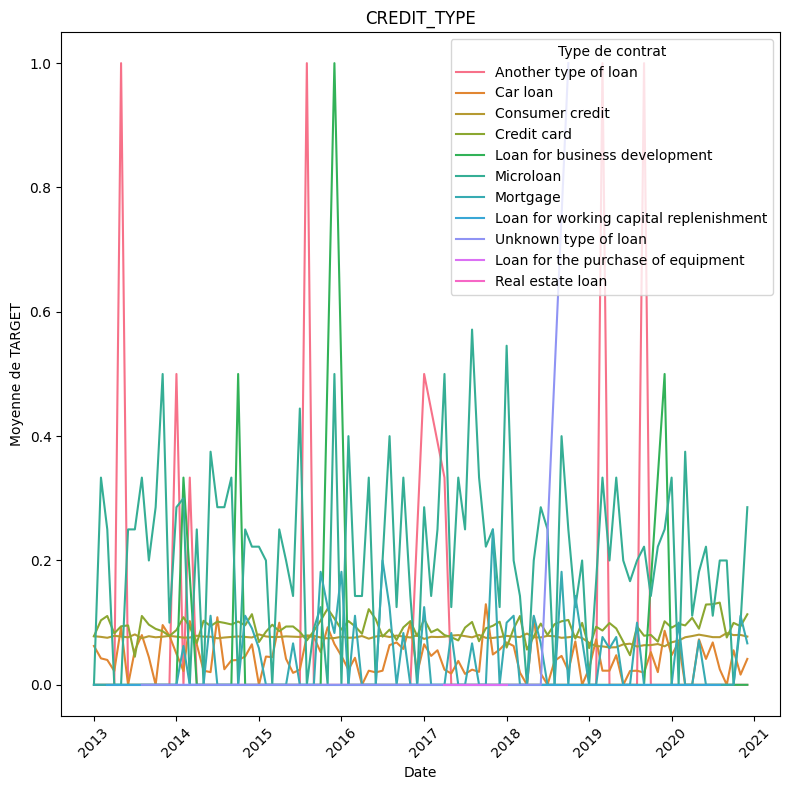

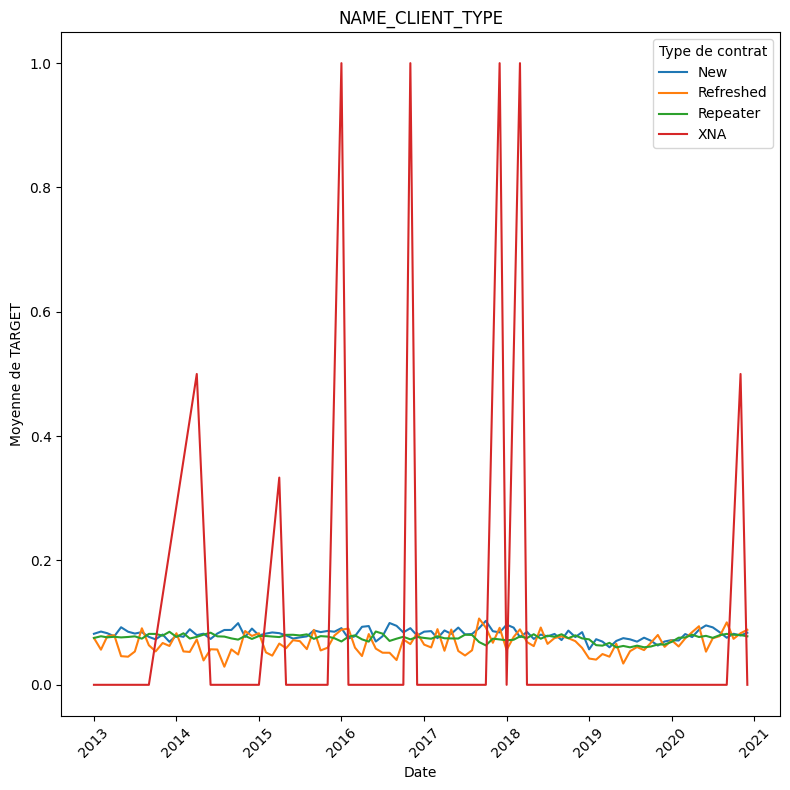

In [28]:
for col in cats :

    groupe = data.groupby(['date_mensuelle', col])['TARGET'].mean().reset_index()

    plt.figure(figsize=(8, 8))
    sns.lineplot(data=groupe, x='date_mensuelle', y='TARGET', hue=col)
    plt.xlabel('Date')
    plt.title(col)
    plt.ylabel('Moyenne de TARGET')
    plt.xticks(rotation=45)
    plt.legend(title='Type de contrat')
    plt.tight_layout()
    plt.show()

In [29]:
data.drop([ 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE'], axis=1, inplace=True)

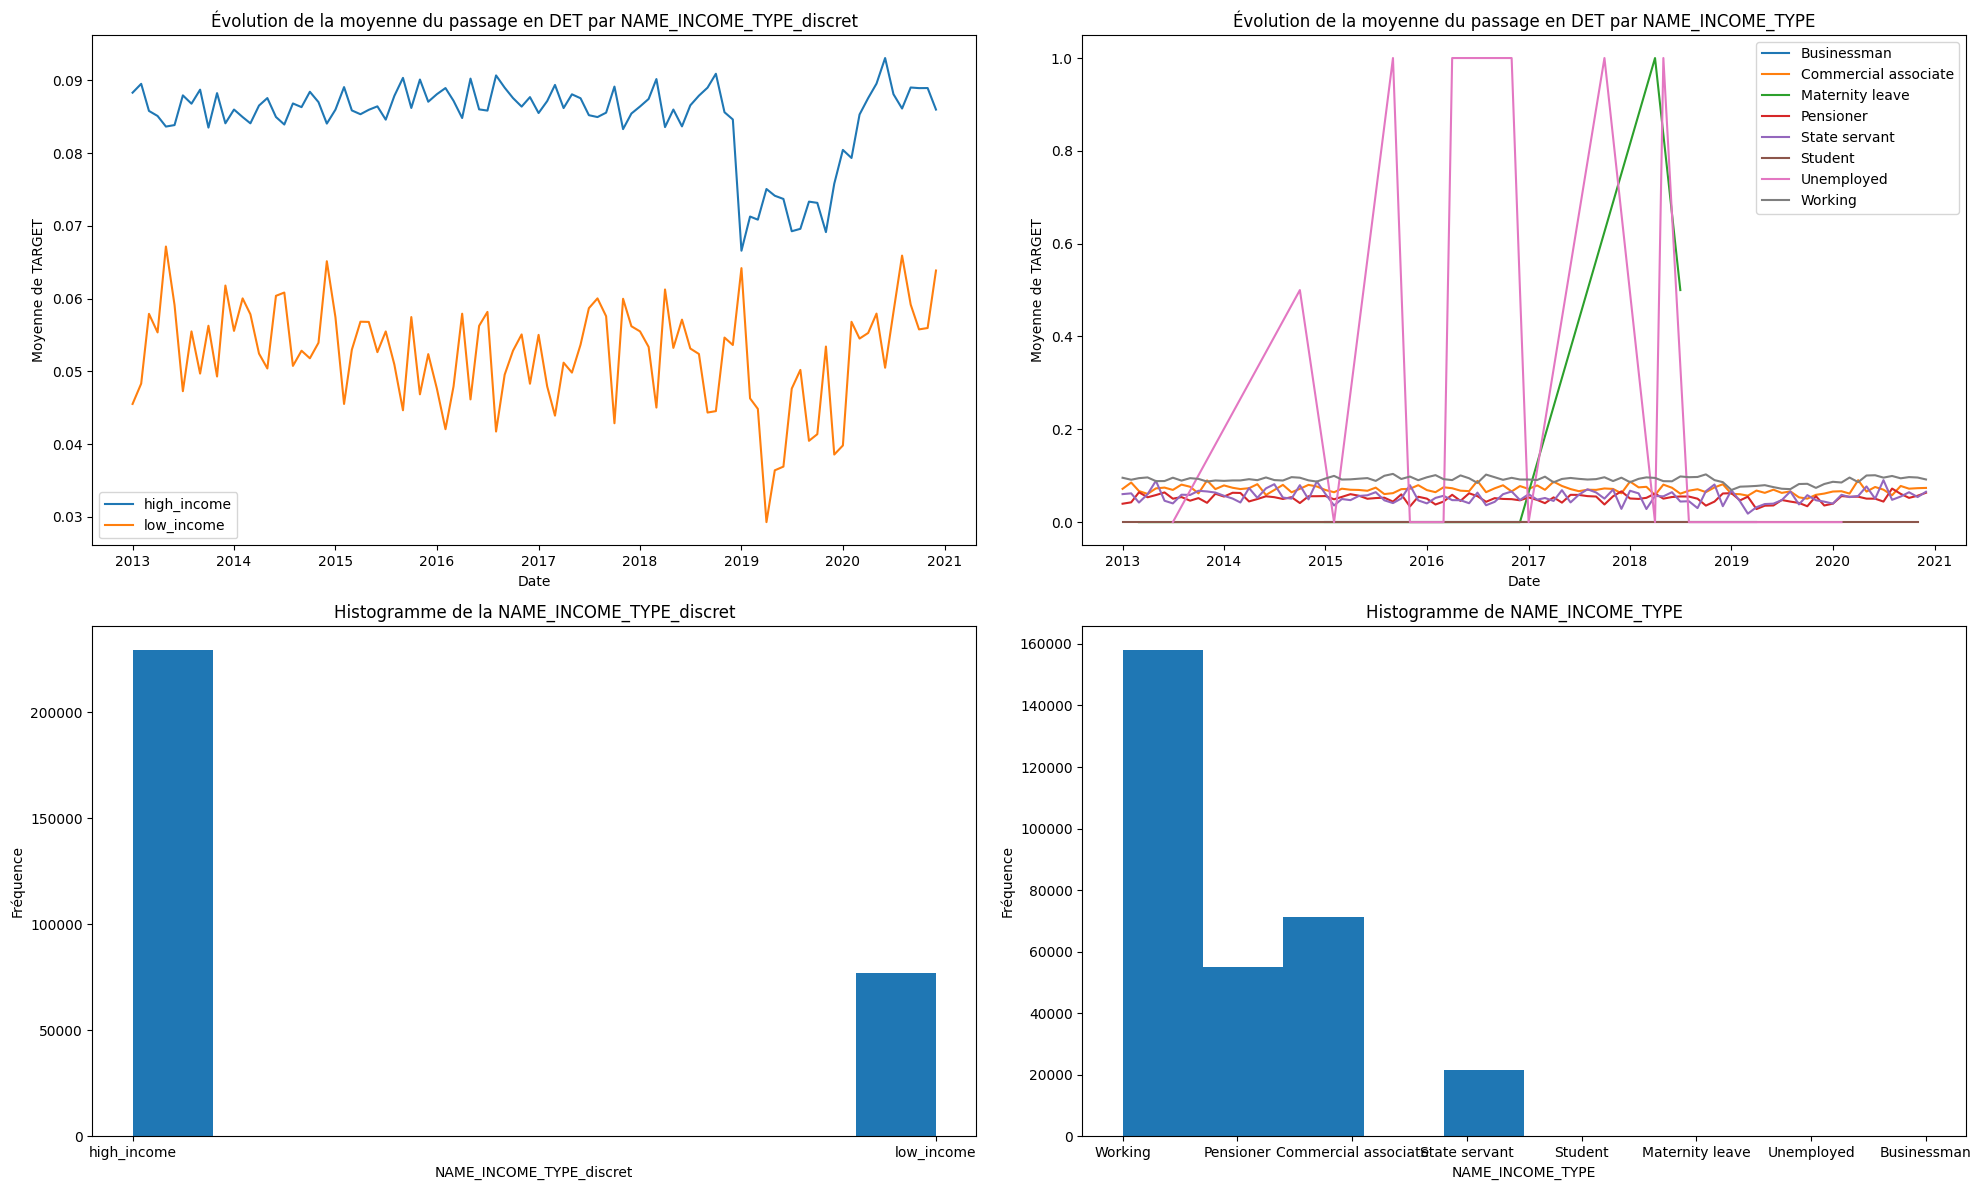

In [30]:
low_income = ['Maternity leave', 'Unemployed', 'State servant', 'Pensioner', 'Student']
high_income = ["Working", "Commercial associate", "Businessman"]

data['NAME_INCOME_TYPE_discret'] = np.select([data['NAME_INCOME_TYPE'].isin(low_income),
                                                data['NAME_INCOME_TYPE'].isin(high_income)],
                                                # data['NAME_INCOME_TYPE'].isin(other)],
                                                ['low_income', 'high_income'], #, 'other'],
                                                default='low_income')



fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

for idx, col in enumerate(data[['NAME_INCOME_TYPE_discret', 'NAME_INCOME_TYPE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne du passage en DET par {col}')

axes[1, 0].hist(data["NAME_INCOME_TYPE_discret"])
axes[1, 0].set_title('Histogramme de la NAME_INCOME_TYPE_discret')
axes[1, 0].set_xlabel('NAME_INCOME_TYPE_discret')
axes[1, 0].set_ylabel('Fréquence')

axes[1, 1].hist(data["NAME_INCOME_TYPE"])
axes[1, 1].set_title('Histogramme de NAME_INCOME_TYPE')
axes[1, 1].set_xlabel('NAME_INCOME_TYPE')
axes[1, 1].set_ylabel('Fréquence')
plt.tight_layout()
plt.show()


## NAME_EDUCATION_TYPE

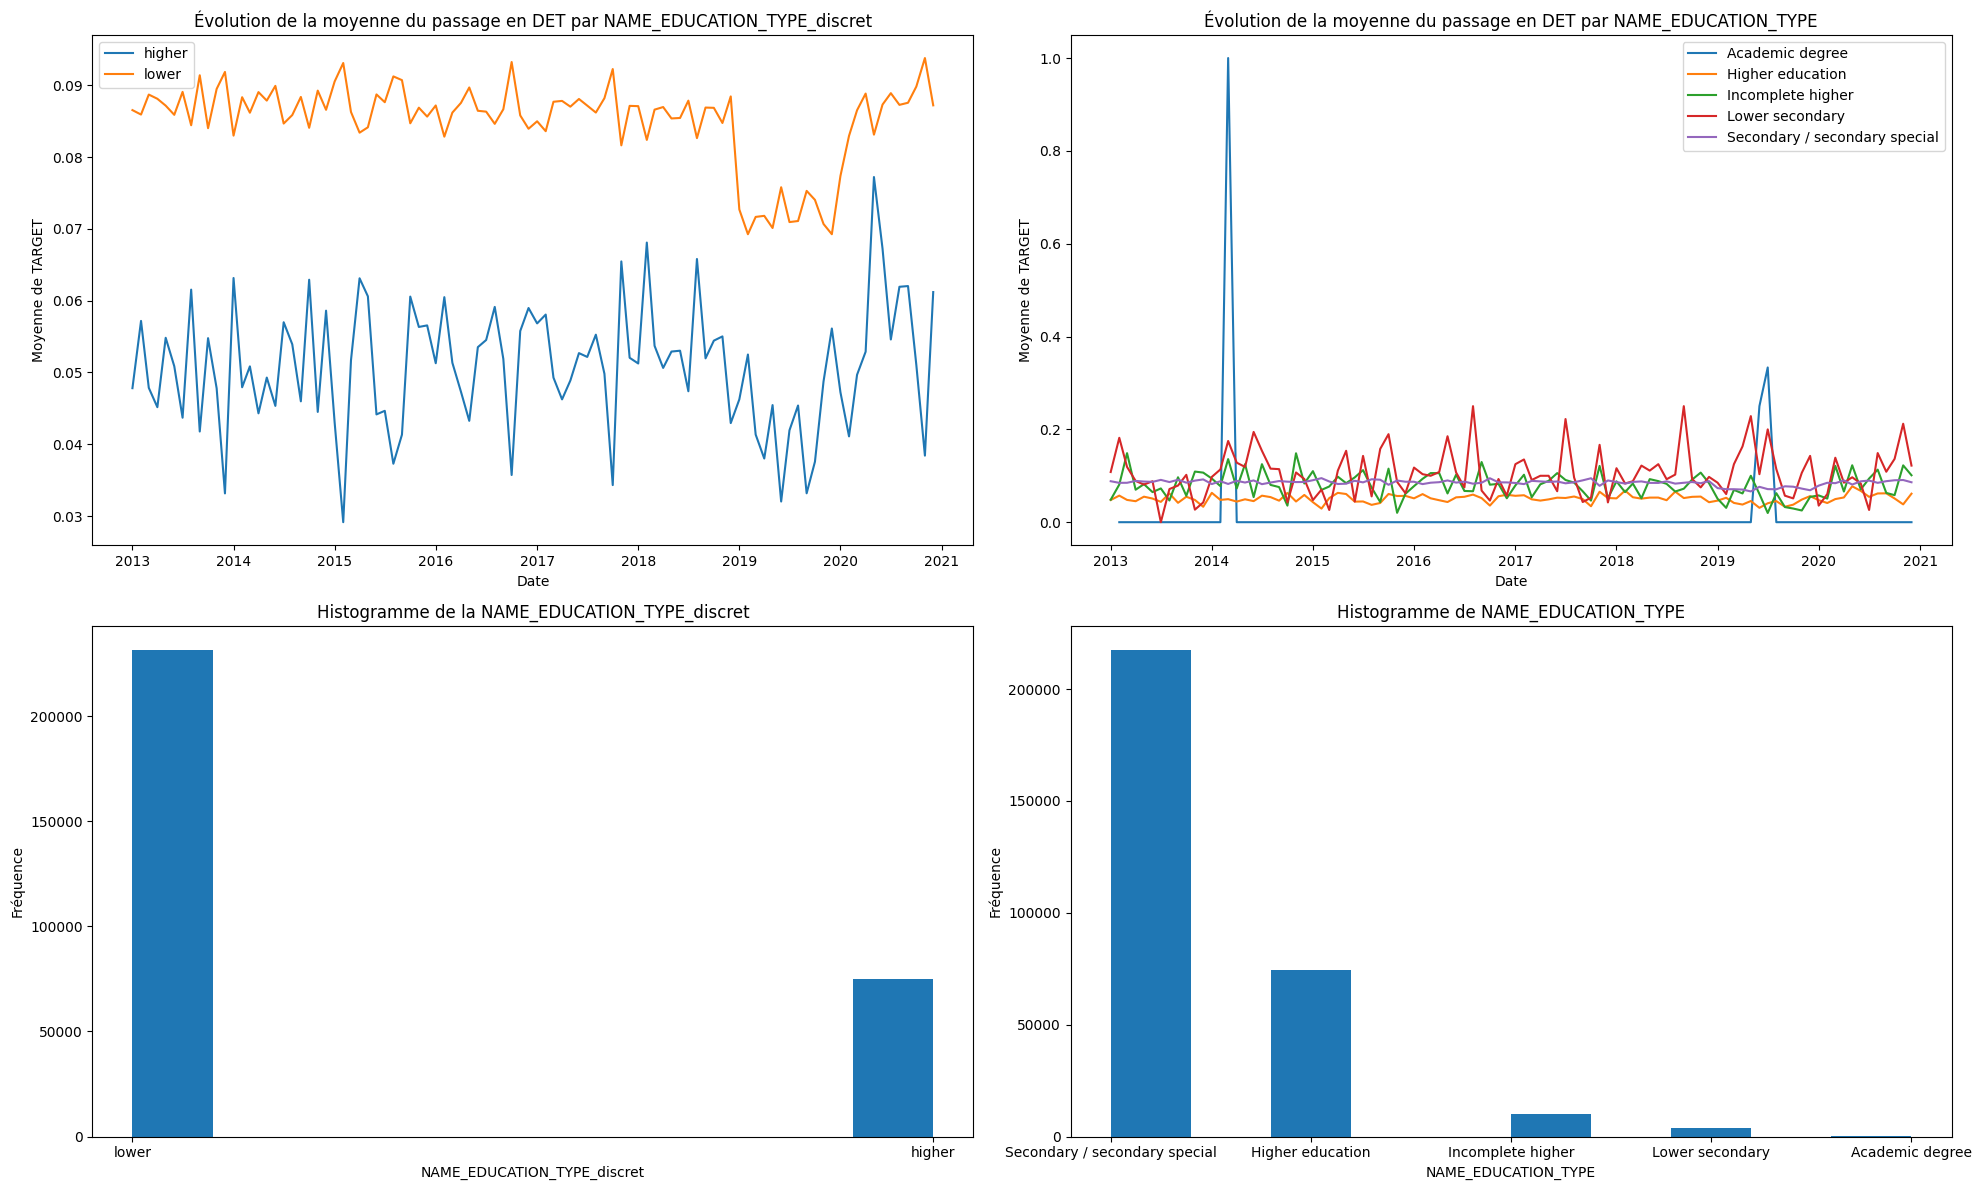

In [31]:
lower = ["Lower_education", "Secondary / secondary special", "Incomplete higher"]
higher = ["Higher education", "Academic degree"]

data['NAME_EDUCATION_TYPE_discret'] = np.select([data['NAME_EDUCATION_TYPE'].isin(lower),
                                        data['NAME_EDUCATION_TYPE'].isin(higher)],
                                        ['lower', 'higher'],
                                        default='lower')


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

for idx, col in enumerate(data[['NAME_EDUCATION_TYPE_discret', 'NAME_EDUCATION_TYPE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne du passage en DET par {col}')

axes[1, 0].hist(data["NAME_EDUCATION_TYPE_discret"])
axes[1, 0].set_title('Histogramme de la NAME_EDUCATION_TYPE_discret')
axes[1, 0].set_xlabel('NAME_EDUCATION_TYPE_discret')
axes[1, 0].set_ylabel('Fréquence')

axes[1, 1].hist(data["NAME_EDUCATION_TYPE"])
axes[1, 1].set_title('Histogramme de NAME_EDUCATION_TYPE')
axes[1, 1].set_xlabel('NAME_EDUCATION_TYPE')
axes[1, 1].set_ylabel('Fréquence')
plt.tight_layout()
plt.show()


## NAME_FAMILY_STATUS

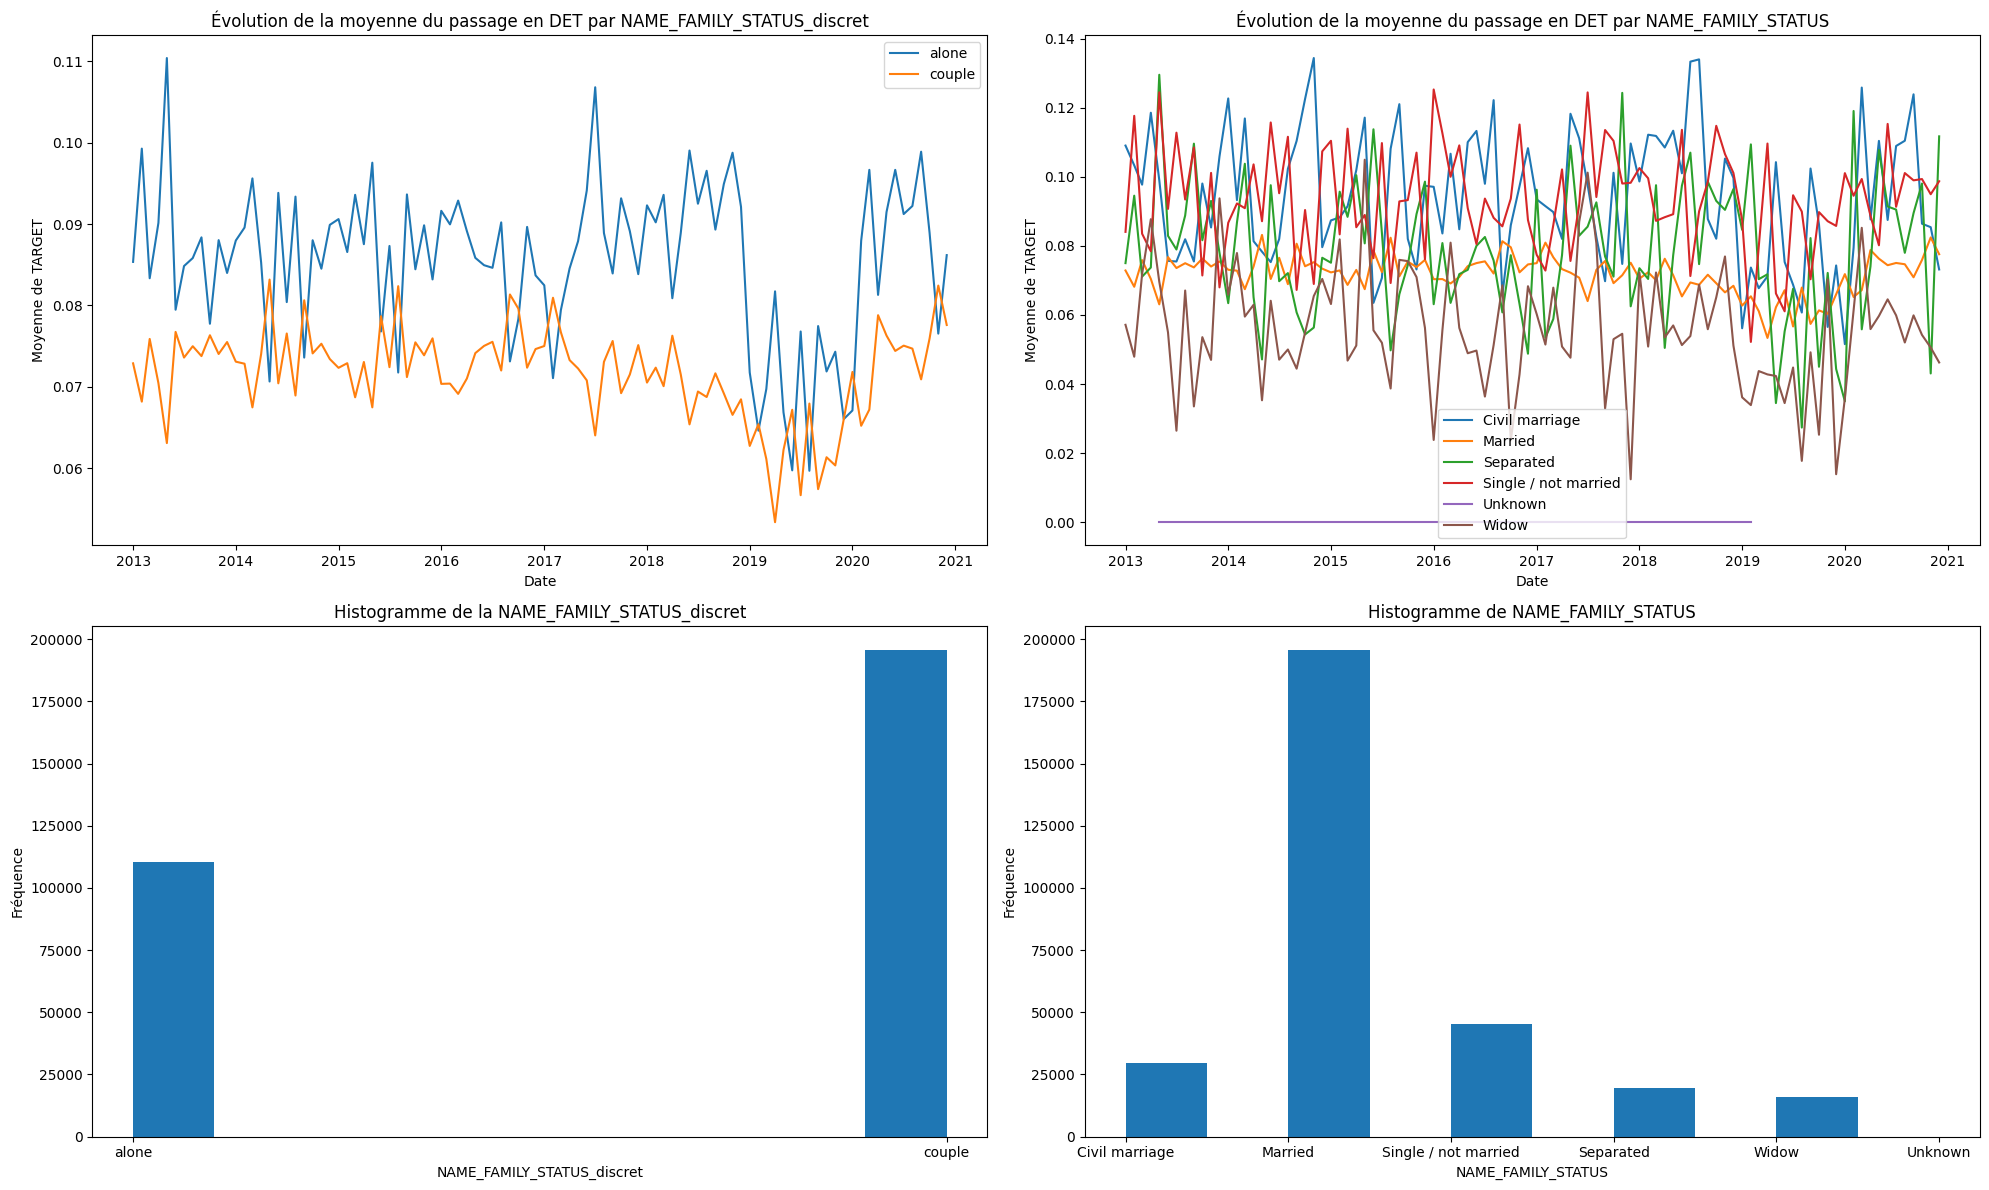

In [32]:
alone = ["Single / not married", "Separated", "Widow", "Security staff", "Laborers", "Unknown","Civil marriage"]
couple = ["Married"]

data['NAME_FAMILY_STATUS_discret'] = np.select([data['NAME_FAMILY_STATUS'].isin(alone),
                                                        data['NAME_FAMILY_STATUS'].isin(couple)],
                                                        ['alone', 'couple'],
                                                        default='couple')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

for idx, col in enumerate(data[['NAME_FAMILY_STATUS_discret', 'NAME_FAMILY_STATUS']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne du passage en DET par {col}')

axes[1, 0].hist(data["NAME_FAMILY_STATUS_discret"])
axes[1, 0].set_title('Histogramme de la NAME_FAMILY_STATUS_discret')
axes[1, 0].set_xlabel('NAME_FAMILY_STATUS_discret')
axes[1, 0].set_ylabel('Fréquence')

axes[1, 1].hist(data["NAME_FAMILY_STATUS"])
axes[1, 1].set_title('Histogramme de NAME_FAMILY_STATUS')
axes[1, 1].set_xlabel('NAME_FAMILY_STATUS')
axes[1, 1].set_ylabel('Fréquence')
plt.tight_layout()
plt.show()


## CREDIT_TYPE

In [33]:
list_mean = []
for cat in data['CREDIT_TYPE'].unique():
    moyenne = data[data['CREDIT_TYPE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['credit'] = data['CREDIT_TYPE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

,moyenne,credit
0,0.208955,Microloan
1,0.142857,Unknown type of loan
2,0.091611,Credit card
3,0.075613,Consumer credit
4,0.061224,Another type of loan
5,0.051948,Loan for business development
6,0.044071,Car loan
7,0.037037,Mortgage
8,0.000000,Loan for working capital replenishment
9,0.000000,Loan for the purchase of equipment


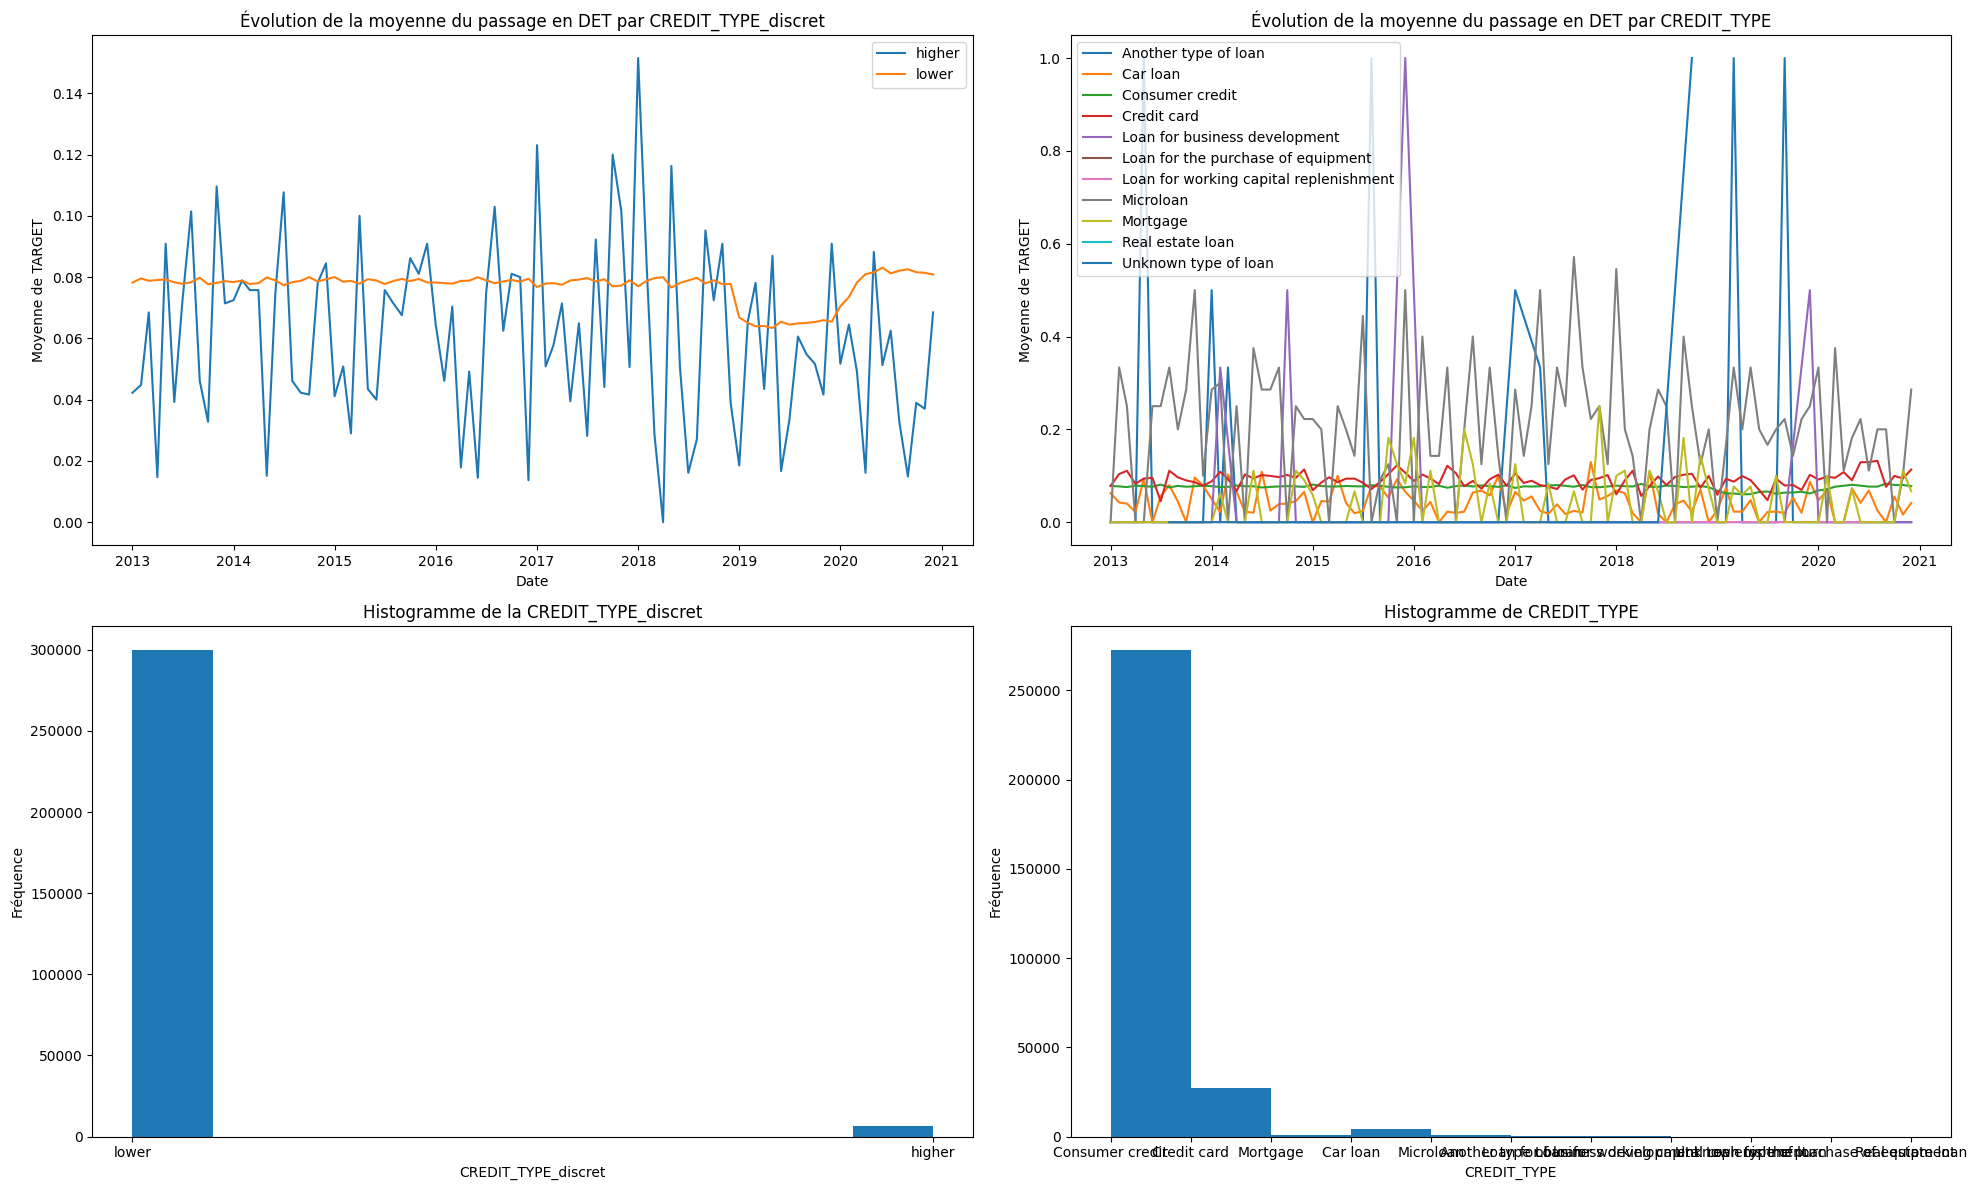

In [34]:
lower = ["Consumer credit", "Credit card"]
higher = ["Car loan", "Microloan", "Loan for business development", "Loan for ", "Mortgage", "Another type of loan", "Unknown type of loan"]

data['CREDIT_TYPE_discret'] = np.select([data['CREDIT_TYPE'].isin(lower),
                                        data['CREDIT_TYPE'].isin(higher)],
                                        ['lower', 'higher'],
                                        default='lower')


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

for idx, col in enumerate(data[['CREDIT_TYPE_discret', 'CREDIT_TYPE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne du passage en DET par {col}')
    
axes[1, 0].hist(data["CREDIT_TYPE_discret"])
axes[1, 0].set_title('Histogramme de la CREDIT_TYPE_discret')
axes[1, 0].set_xlabel('CREDIT_TYPE_discret')
axes[1, 0].set_ylabel('Fréquence')

axes[1, 1].hist(data["CREDIT_TYPE"])
axes[1, 1].set_title('Histogramme de CREDIT_TYPE')
axes[1, 1].set_xlabel('CREDIT_TYPE')
axes[1, 1].set_ylabel('Fréquence')
plt.tight_layout()
plt.show()



## NAME_CLIENT_TYPE

In [42]:
data[data["NAME_CLIENT_TYPE"]=='XNA']
data["NAME_CLIENT_TYPE"] = data["NAME_CLIENT_TYPE"].replace("XNA", data["NAME_CLIENT_TYPE"].mode()[0])

In [43]:
list_mean = []
for cat in data['NAME_CLIENT_TYPE'].unique():
    moyenne = data[data['NAME_CLIENT_TYPE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['credit'] = data['NAME_CLIENT_TYPE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

,moyenne,credit
0,0.081539,New
1,0.075320,Repeater
2,0.066828,Refreshed


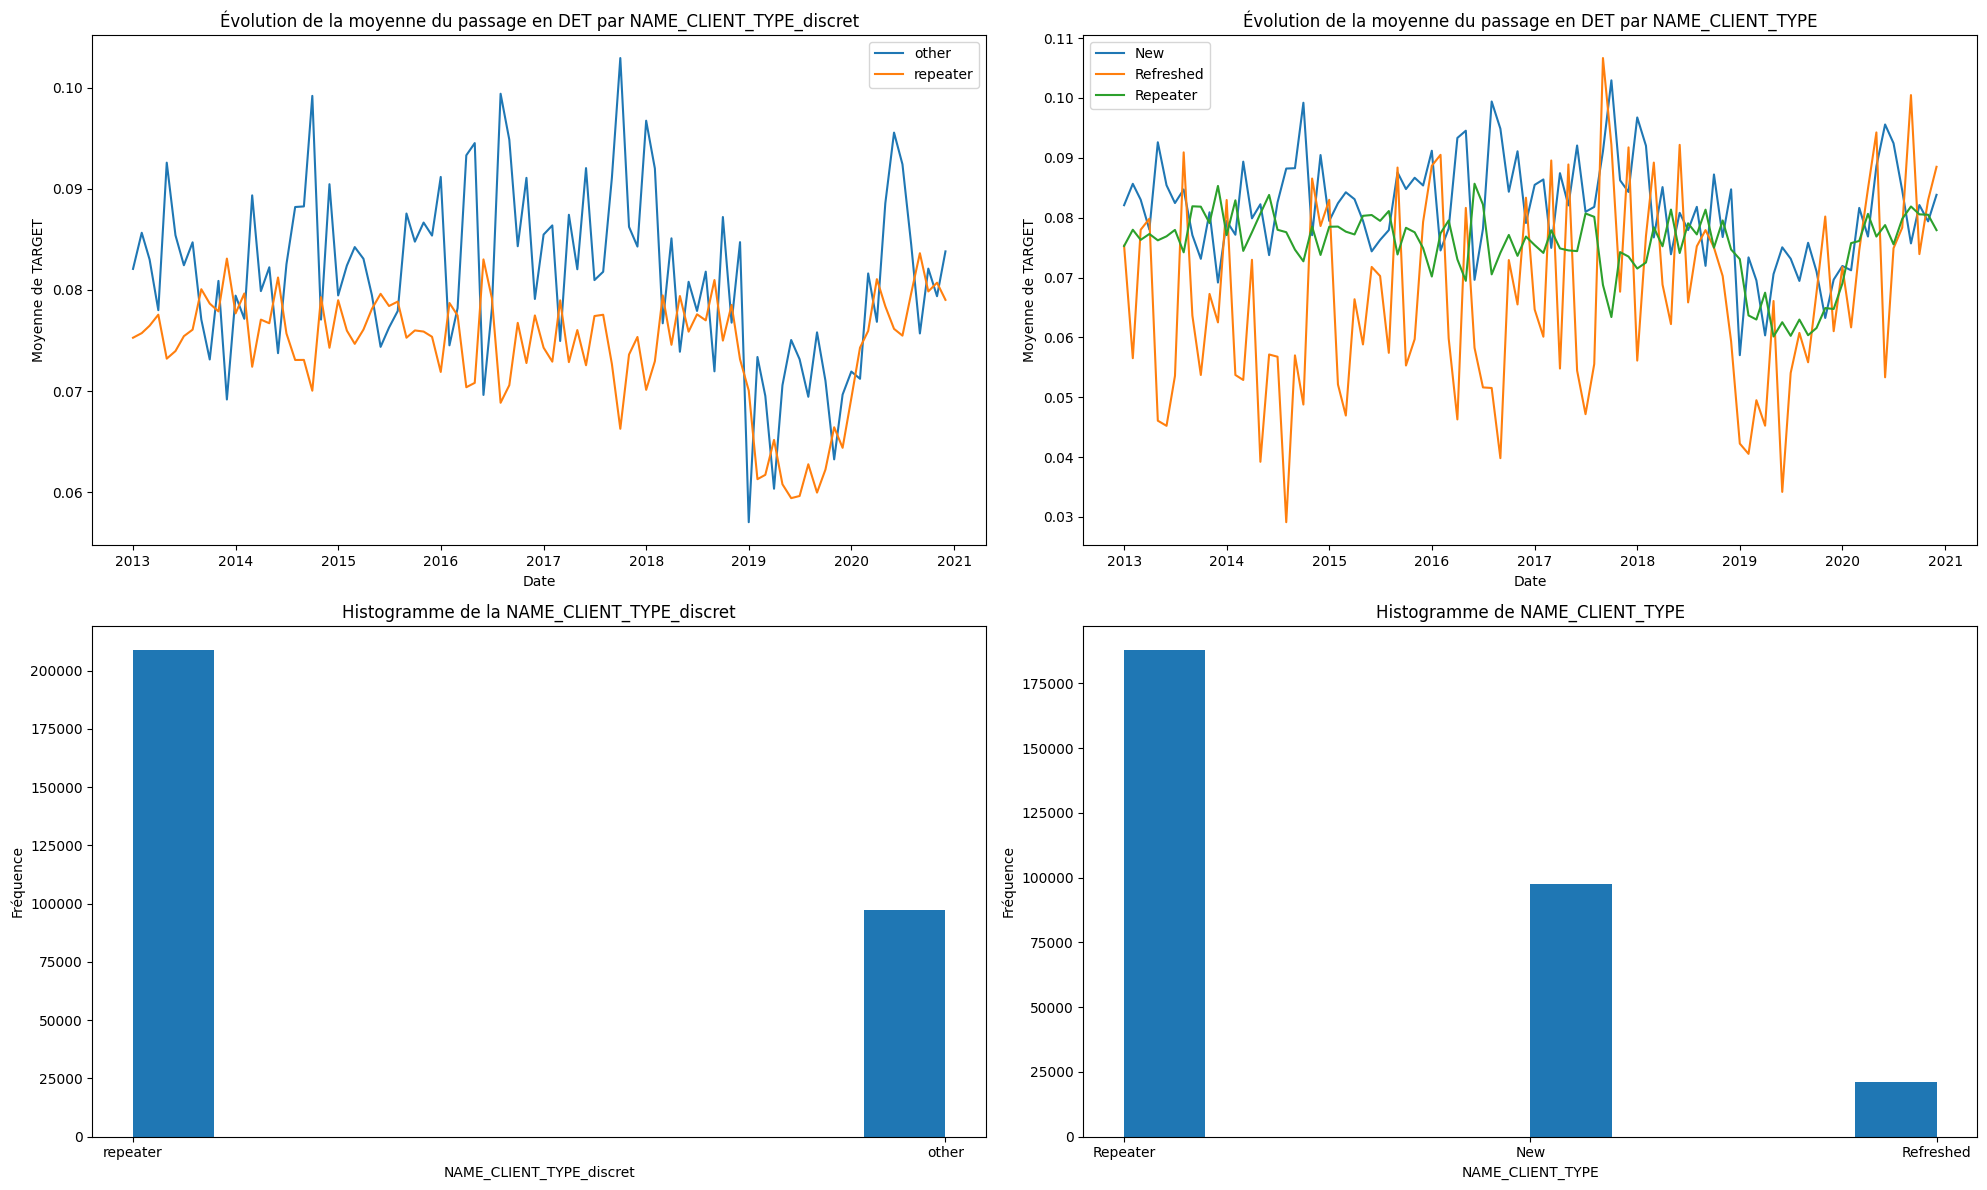

In [49]:
repeater = ["Repeater", "Refreshed"]
other = ["New"]

data['NAME_CLIENT_TYPE_discret'] = np.select([data['NAME_CLIENT_TYPE'].isin(repeater),
                                        data['NAME_CLIENT_TYPE'].isin(other)],
                                        ['repeater', 'other'],
                                        default='repeater')


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

for idx, col in enumerate(data[['NAME_CLIENT_TYPE_discret', 'NAME_CLIENT_TYPE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne du passage en DET par {col}')
    
axes[1, 0].hist(data["NAME_CLIENT_TYPE_discret"])
axes[1, 0].set_title('Histogramme de la NAME_CLIENT_TYPE_discret')
axes[1, 0].set_xlabel('NAME_CLIENT_TYPE_discret')
axes[1, 0].set_ylabel('Fréquence')

axes[1, 1].hist(data["NAME_CLIENT_TYPE"])
axes[1, 1].set_title('Histogramme de NAME_CLIENT_TYPE')
axes[1, 1].set_xlabel('NAME_CLIENT_TYPE')
axes[1, 1].set_ylabel('Fréquence')
plt.tight_layout()
plt.show()



In [51]:
data.drop(["NAME_INCOME_TYPE", 'NAME_EDUCATION_TYPE', "NAME_FAMILY_STATUS",
           "CREDIT_TYPE", "CREDIT_TYPE_discret",
           'NAME_CLIENT_TYPE', 'NAME_CLIENT_TYPE_discret'], axis=1, inplace=True)

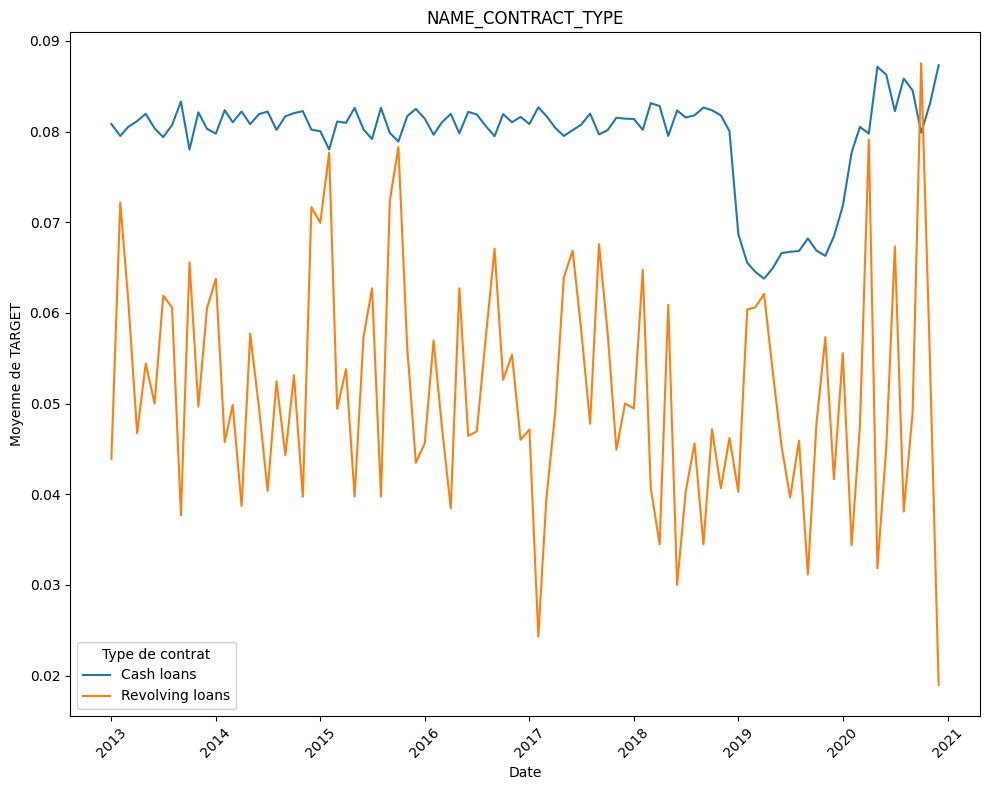

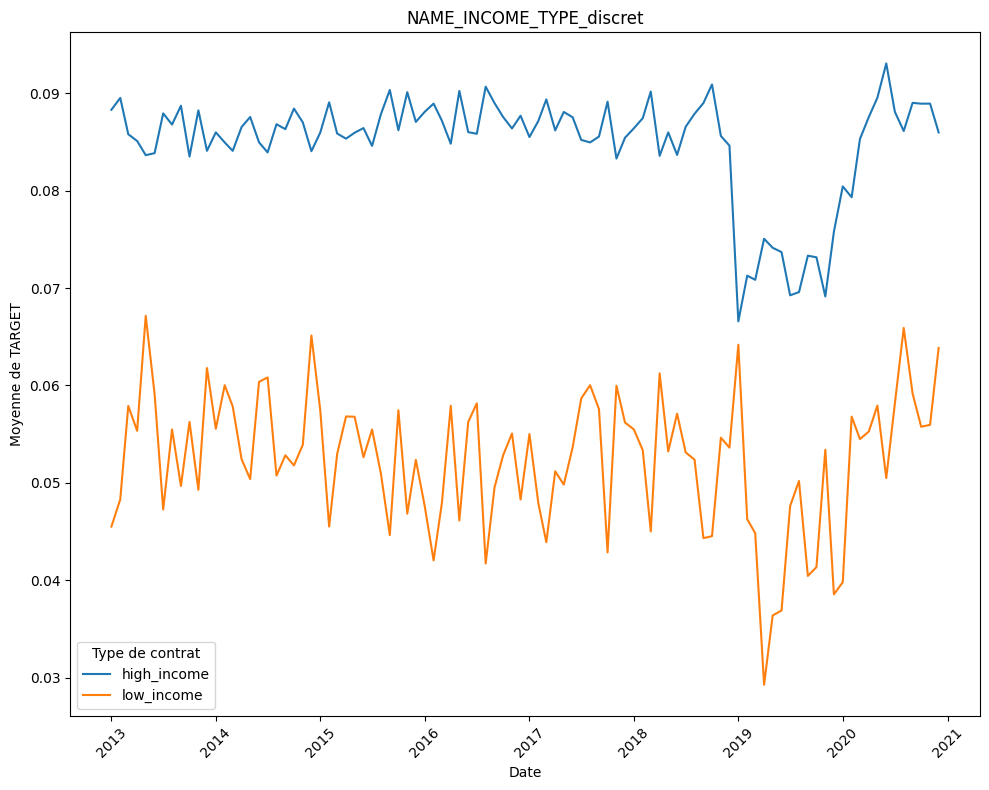

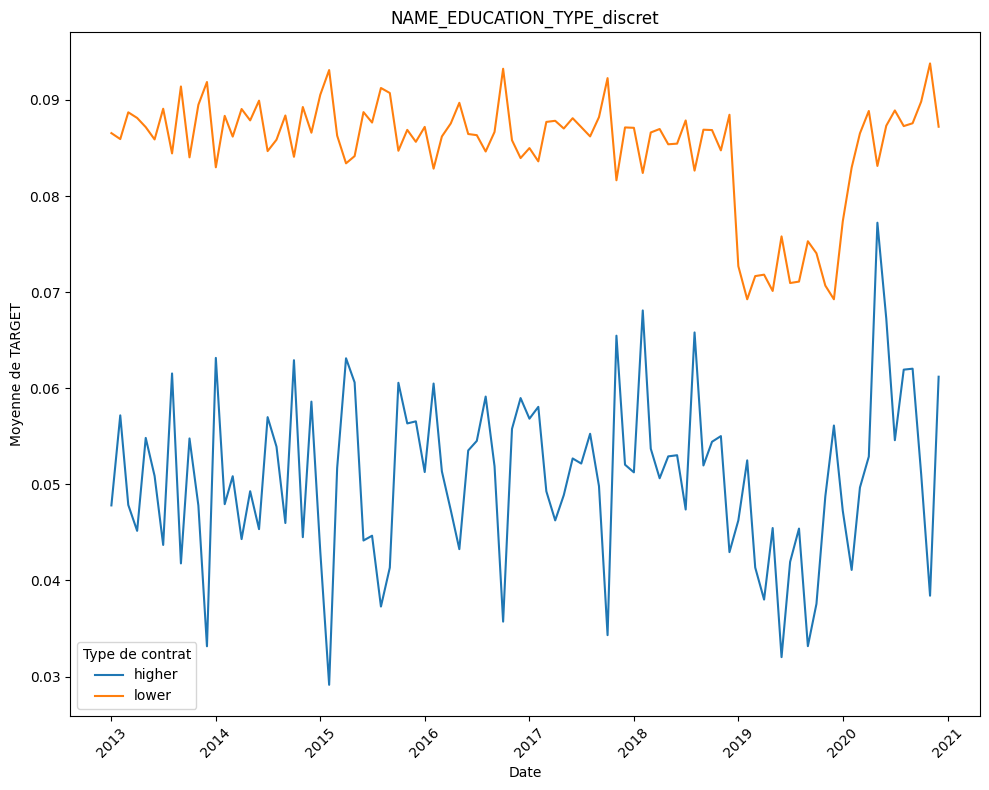

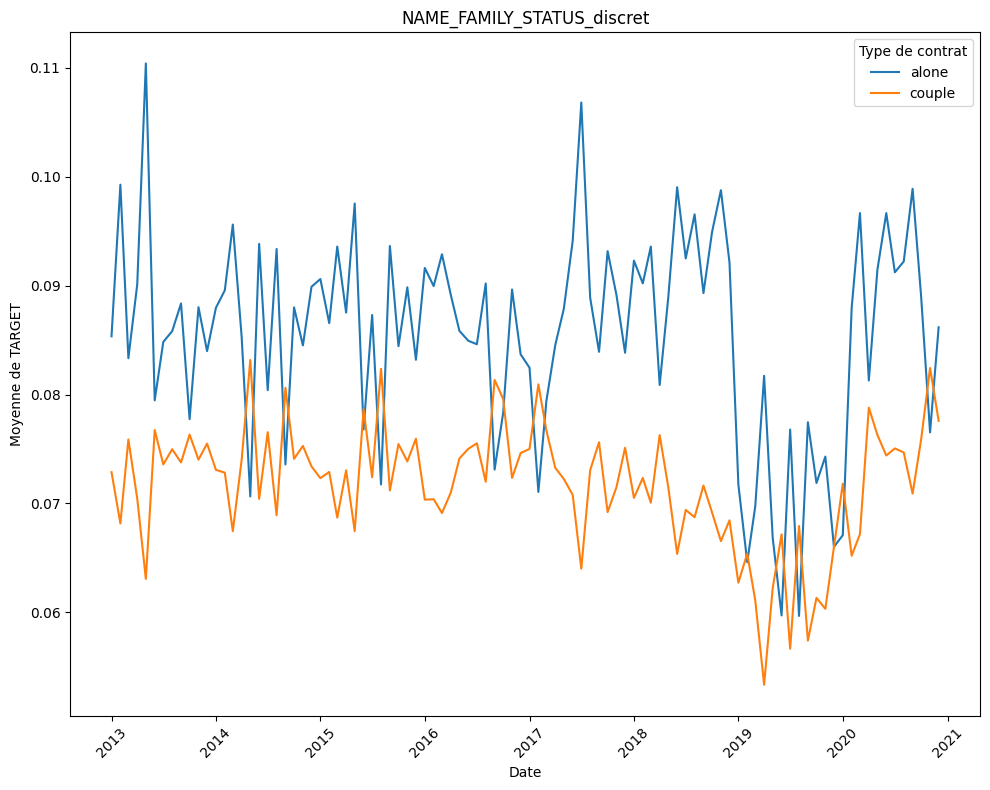

In [53]:
new_cats = data.select_dtypes(include=['object']).columns
for col in new_cats:

    groupe = data.groupby(['date_mensuelle', col])['TARGET'].mean().reset_index()

    plt.figure(figsize=(10, 8))
    sns.lineplot(data=groupe, x='date_mensuelle', y='TARGET', hue=col)
    plt.xlabel('Date')
    plt.title(col)
    plt.ylabel('Moyenne de TARGET')
    plt.xticks(rotation=45)
    plt.legend(title='Type de contrat')
    plt.tight_layout()
    plt.show()

## Numériques

In [68]:
from deap import base, creator, tools, algorithms
from functools import  partial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, module="deap.creator")

In [89]:
num = [ 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'AMT_ANNUITY',
 'DAYS_EMPLOYED',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'AMT_CREDIT_SUM',
 'AMT_CREDIT_SUM_DEBT',
 'AMT_CREDIT_SUM_LIMIT',
 'AMT_CREDIT_SUM_OVERDUE',
 'CNT_INSTALMENT_FUTURE',
 'AMT_APPLICATION',
 'AMT_CREDIT_y',
 'AMT_PAYMENT']
var_to_categorize = [var for var in num if data[var].nunique() < 20]
num_final = [var for var in num if var not in var_to_categorize]


In [92]:
dict_variables = {}

for var in num_final:
    dict_variables[var] = 3

In [93]:
dict_variables

{'AMT_INCOME_TOTAL': 3,
 'AMT_CREDIT_x': 3,
 'AMT_ANNUITY': 3,
 'DAYS_EMPLOYED': 3,
 'EXT_SOURCE_2': 3,
 'EXT_SOURCE_3': 3,
 'AMT_CREDIT_SUM': 3,
 'AMT_CREDIT_SUM_DEBT': 3,
 'AMT_CREDIT_SUM_LIMIT': 3,
 'AMT_CREDIT_SUM_OVERDUE': 3,
 'CNT_INSTALMENT_FUTURE': 3,
 'AMT_APPLICATION': 3,
 'AMT_CREDIT_y': 3,
 'AMT_PAYMENT': 3}

In [94]:
def calculate_stability(column):
    stability_df = data.groupby(['date_mensuelle', column])['TARGET'].mean().unstack()
    
    stability_df['stability'] = stability_df.std(axis=1) / stability_df.mean(axis=1)
    return stability_df

In [95]:
def plot_stability(variable):
    stability_df = calculate_stability(variable)  
    plt.figure(figsize=(10, 5))
    
    for class_label in stability_df.drop('stability', axis=1).columns:
        values = stability_df[class_label]
        plt.plot(stability_df.index, values, label=f'Classe {class_label}', marker='o')
    
    plt.title(f'Stabilité de l\'impact sur la cible pour {variable}')
    plt.xlabel('Date')
    plt.ylabel('Proportion de la cible TARGET')
    plt.legend(title=f'Classes de_binned', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [96]:
def evalChi2(individual, variable):
    individual_sorted = sorted(individual)
    percentiles = [max(0, min(i * 100, 100)) for i in individual_sorted]
    thresholds = np.percentile(data[variable].dropna(), percentiles)
    
    thresholds = np.unique(thresholds)
    
    disc_var = np.digitize(data[variable], thresholds)
    data['disc_var'] = disc_var
    
    contingency_table = pd.crosstab(data['disc_var'], data['TARGET'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2

In [97]:
def Run_Genetic_Discretisation(VARIABLE, NB_CLASSES_MAX):
    NB_GEN = 50
    POP_SIZE = 100  
    CXPB, MUTPB = 0.5, 0.2  


    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    
    def custom_crossover(ind1, ind2):
        if len(ind1) > 1 and len(ind2) > 1:
            return tools.cxTwoPoint(ind1, ind2)
        else:
            return ind1, ind2

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.uniform, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=NB_CLASSES_MAX)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", partial(evalChi2, variable=VARIABLE))
    toolbox.register("mate", custom_crossover)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    population = toolbox.population(n=POP_SIZE)
    algorithms.eaSimple(population, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NB_GEN, verbose=True)
    
    best_ind = tools.selBest(population, 1)[0]
    return(best_ind)

In [98]:
for variable in dict_variables : 
    print(variable)
    bins = Run_Genetic_Discretisation(variable, dict_variables[variable])
    bins_normalise = sorted([min(1, max(0, val)) for val in bins])
    
    seuils = np.percentile(data[variable].dropna(), [val * 100 for val in bins_normalise])
    seuils_uniques = np.unique(seuils)
    
    data[f'{variable}_disc'] = np.digitize(data[variable], seuils_uniques)
    
    stability_df = calculate_stability(f'{variable}_disc')  
    plt.figure(figsize=(10, 5))
    
    for class_label in stability_df.drop('stability', axis=1).columns:
        values = stability_df[class_label]
        plt.plot(stability_df.index, values, label=f'Classe {class_label}', marker='o')
    
    plt.title(f'Stabilité de l\'impact sur la cible pour {variable}_disc')
    plt.xlabel('Date')
    plt.ylabel('Proportion de la cible TARGET')
    plt.legend(title=f'Classes de_binned', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

AMT_INCOME_TOTAL


TypeError: object of type 'numpy.float64' has no len()